<h1 align = "Center" ;style="font-family:verdana; font-size:300%;color:red;"> upGrad Assignment </h1>
<h2 align = "Center" ;style="font-family:verdana; font-size:200%;"> Submitted By Shubham Bansla </h2>

### Contents
<ol>    
<li>Problem Statement </li>
<li>Description of Data Set </li>
<li>Missing Value Treatment</li>
<li>Data Insights</li>
    <ol>
        <li type="a"> Data Visualisation</li>
        <li type ="a"> Inferences</li>
    </ol>
    
<li>Correlation Analysis</li>
<li>Data Pre-Processing and Feature Engineering</li>
<li>Model Building and Model Selection</li>
    <ol>
    <li type = "a">Train and Test Split</li>
    <li type = "a">Model - 1 Logistic Regression</li>
    <li type = "a">Model - 2 Decision Tree</li>
    <li type = "a">Model - 3 Support Vector Machines</li>
    <li type = "a">Model - 4 Ensemble Model ( Random Forest )</li>
    </ol>
</ol>

<hr>

## Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R/Python and achieve the following goals:


•	Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized

•	Present the financial benefit of this project to the marketing team

<hr>

 <h1 align ="Center"> Importing Libraries and Packages </h1>

In [122]:
import pandas as pd
import numpy as np

In [123]:
#Importing the visulaisation library
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

<h1 align="Center"> Importing and Describing Data Set </h1>

In [125]:
# Since the data set is separated by ";" i am using sep argument
df = pd.read_csv("bank-additional-full.csv",sep=';')

In [126]:
# Lets see first ten rows fo the data set
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [127]:
# Finding the name of the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [128]:
# Finding the data types of the column
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [129]:
# Separating Categorical variable and numerical variable for visualisation

# Cat stands for categorical variable
cat = df[['job','marital','education','default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y']]

# num stands for numerical variable
num = df[['age','duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [37]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Finding number of rows and columns
df.shape

(41188, 21)

<h3 style = "color : red"> Intital Findings of The Data </h3>

- There are total of 41188 records
- 10 numeric attributes
- 10 are categorical variable
    - 6 multi valued Categorical Attributes
    - 3 yes/no binary attributes
    - 1 traget attribute y 

<hr>

## Finding Missing Value

In [106]:
# Finding Missing Value
df.isnull().sum()
# There is no missing value in the data set 

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<p> There is no missing value in the data set </p>
<hr> 

 <h1 align = "Center"; style = "font-size : 200%;" > Data Visualization and Inference </h1>

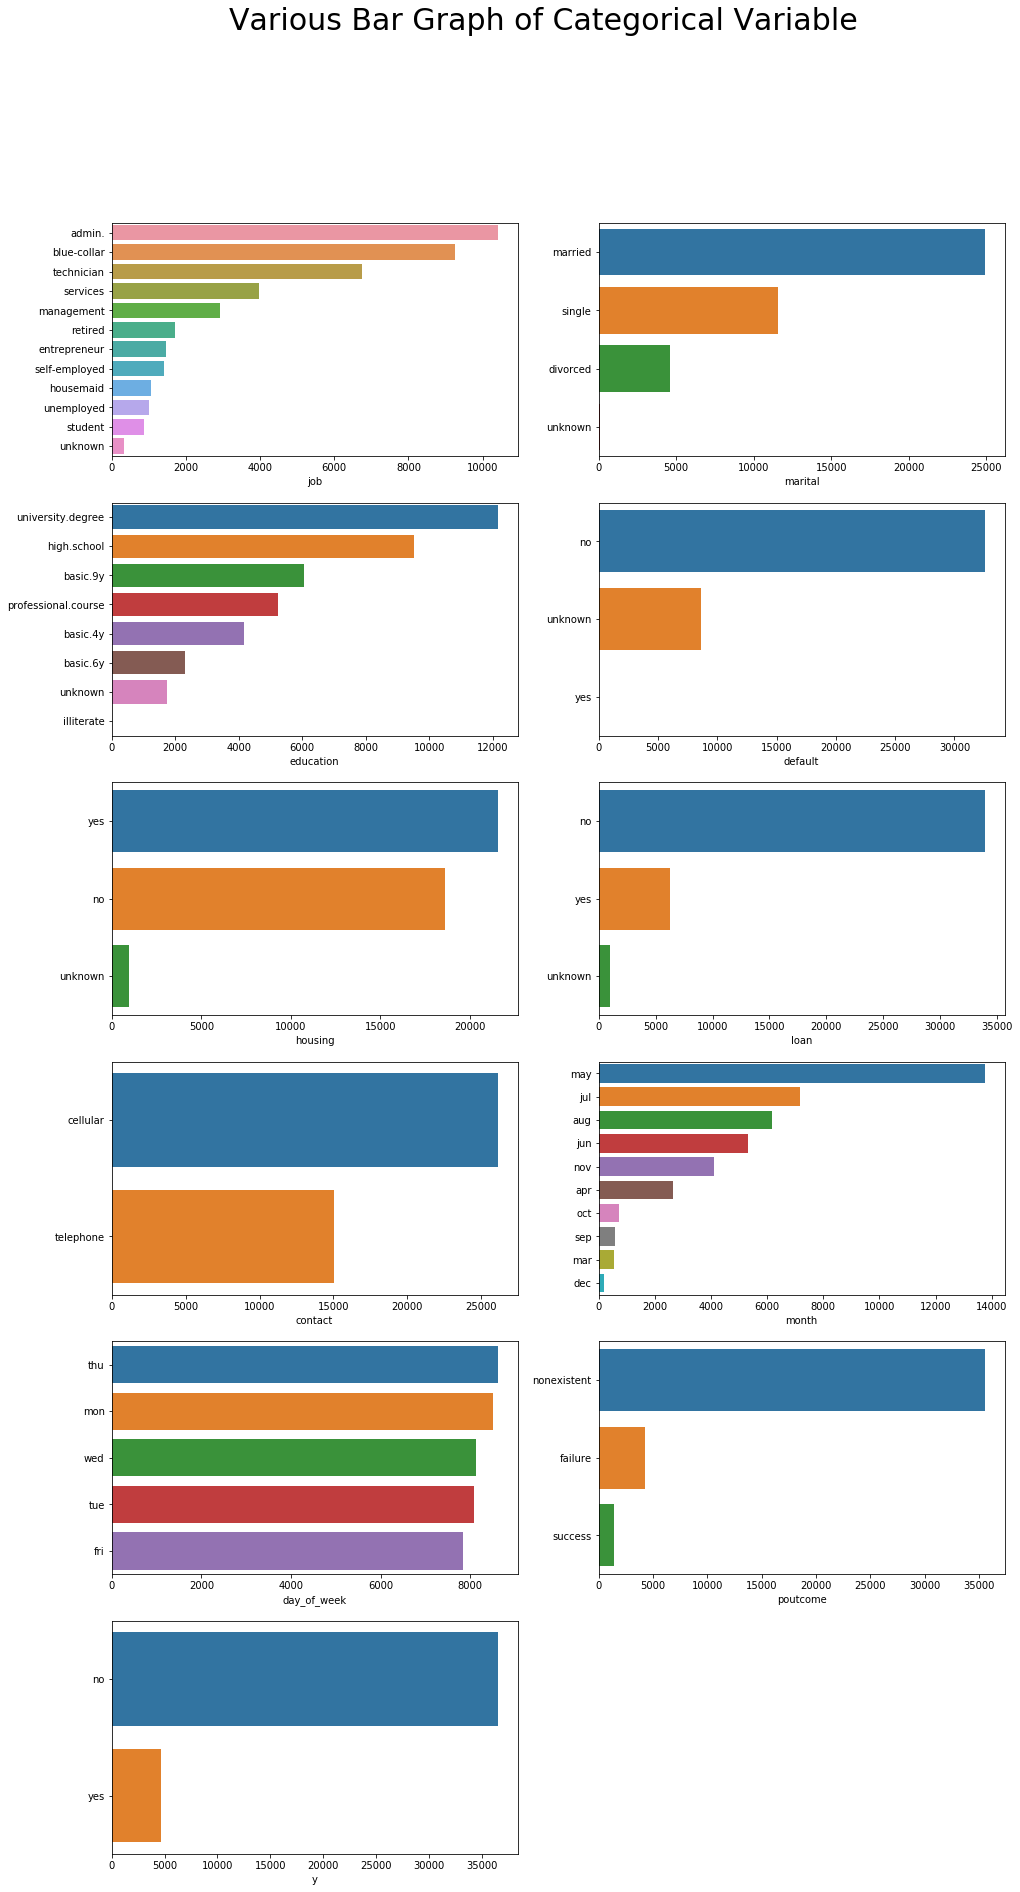

In [170]:
k=1
fig = plt.figure(figsize = (16,30))
fig.suptitle("Various Bar Graph of Categorical Variable",fontsize=30)
for i in cat:
    plt.subplot(6,2,k)
    sns.barplot(y = df[i].value_counts().index, x = df[i].value_counts())
    #plt.title(str(i))
    
    k +=1
plt.show()

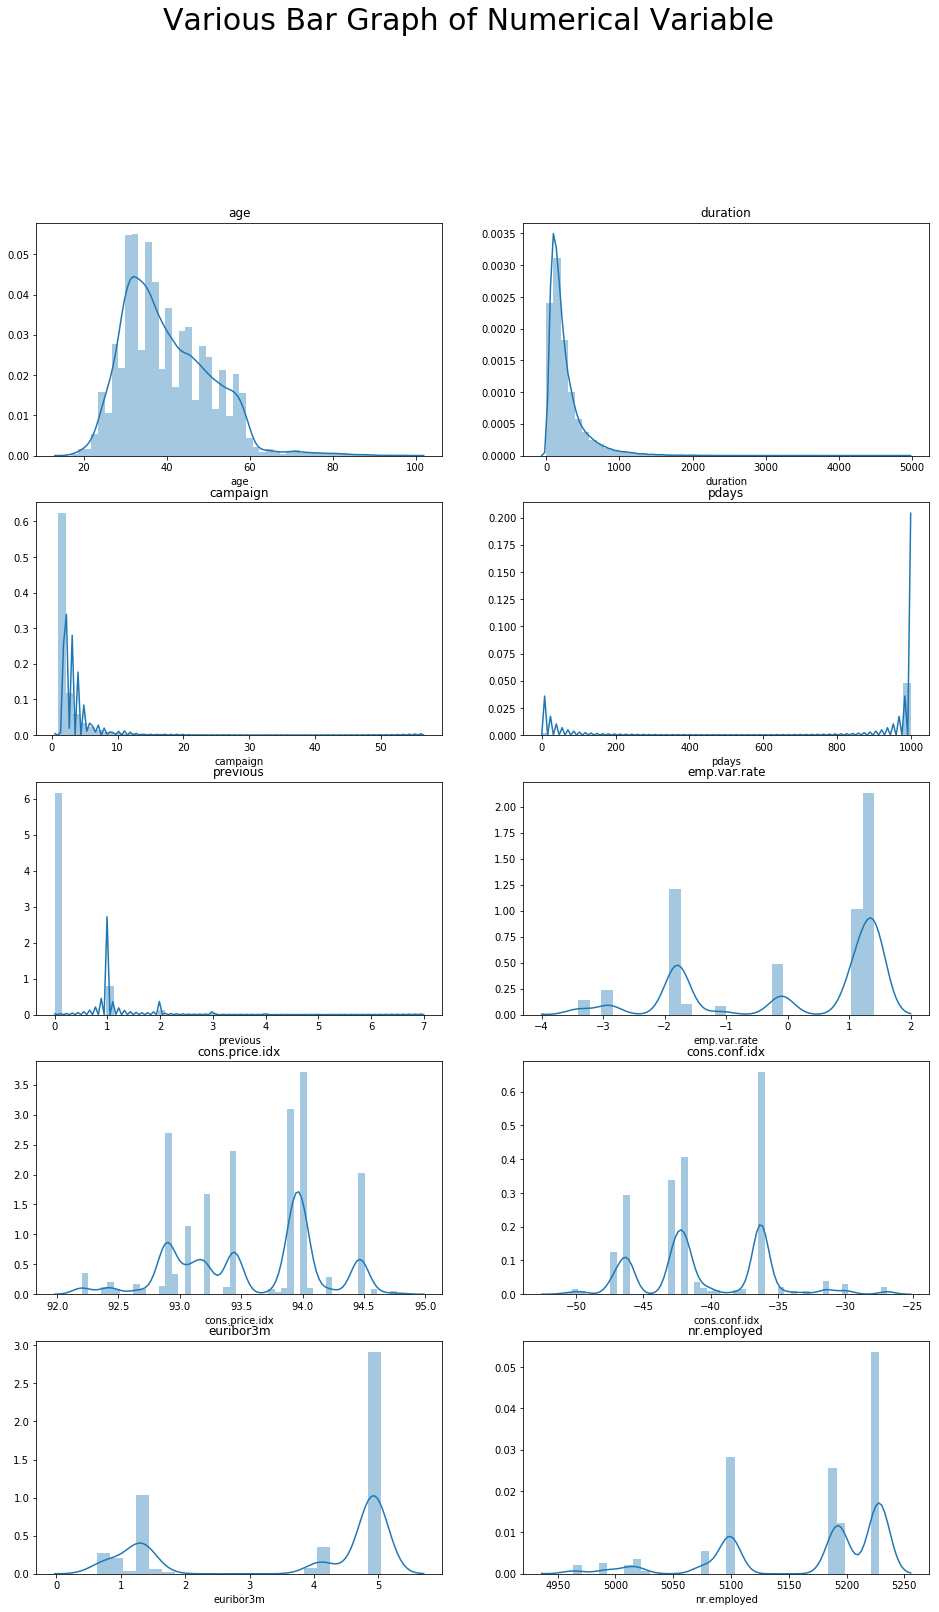

In [164]:
k=1
fig = plt.figure(figsize = (16,30))
fig.suptitle("Various Bar Graph of Numerical Variable",fontsize=30)
for i in num:
    plt.subplot(6,2,k)
    sns.distplot(df[i])
    plt.title(str(i))
    
    k +=1
plt.show()

<h3 style = "color :Red"> DATA INSIGHTS </h3>

- Most of the clients have never been contacted since contact is unknown for 28.79 %
- 81.74% the time outcome of previous marketing campaign is unknown
- Duration seems to have a lot more variation, it may be a good predictor
- Data is vaery imbalanced, only 11.69% yes in outcome

In [171]:
# conisdering two variable and try to find out the insights
pd.crosstab(df.job,df.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


<h3 style = "color :Red"> DATA INSIGHTS </h3>

- Most of the blue-collar job are having the education basic.4y, basic.6y, basic.9y
- admin jobs have the highest university degree that is 5753

<hr>

<h1 align ="Center"> Correlation Ananlysis </h1>

In [39]:
corr = df.corr()

In [40]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


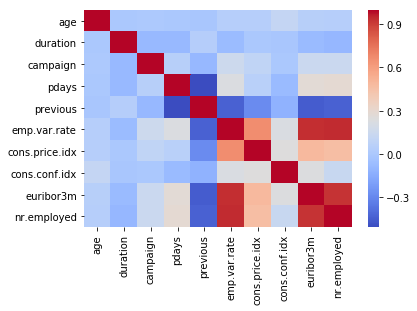

In [70]:
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

<hr>

<h1 align ="Center"> Data Preprocessing and Feature Engineering </h1>

In [174]:
# replacing differnet types of basic education with "basic"
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [72]:
# dropping some of the unimportant variable to increase the accuracy
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

### Converting Categorical variable into numeric using Label Encoder

In [77]:
le = preprocessing.LabelEncoder()

In [78]:
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [85]:
df.y = le.fit_transform(df.y)

In [86]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [87]:
df.shape

(41188, 15)

### Dividing the response variable and the target varaible

In [88]:
# Taking all the response variable in X
X = df.iloc[:,0:14]

In [89]:
X.head(10)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.857,5191.0
5,45,7,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,3,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
7,41,1,1,5,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
8,24,9,2,3,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0
9,25,7,2,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0


In [90]:
y = df.iloc[:,14]

In [94]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

<hr>
<h1 align = "center"; style = "font : 300%"> Model Building and Selection </h1>

### Train and Test Split

In [95]:
# Test and Train Split
from sklearn import model_selection

In [96]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [97]:
x_train.shape, y_train.shape

((32950, 14), (32950,))

In [98]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Model -1 Logistic Regression

In [101]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [102]:
model.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
prediction=model.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8999757222626851

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7258   61]
 [ 763  156]]


### Model - 2 Decision Tree

In [118]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [119]:
predict_decisiontree = clf.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict_decisiontree)

0.8430444282592863

### Model - 3 Support Vector Machine

In [107]:
from sklearn.svm import SVC
clf = SVC()

In [109]:
clf.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [110]:
pred = clf.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8948773974265598

### Model - 4 Ensemble Models ( Random Forest Classifier)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [113]:
rfc.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
predict = rfc.predict(x_test)

In [115]:
accuracy_score(y_test, predict)

0.8935421218742413

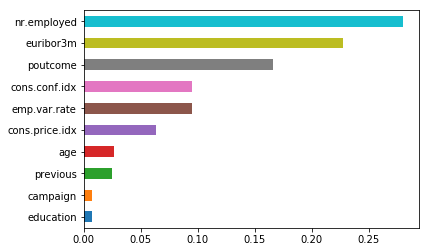

In [172]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X, y)
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Results and Recommendation

-  In "Duration" variable people are saying more yes. People having longer conversation with the bank showing the higher interset. The bank should foucs on the clients who have significant call duration.
- Agent should also target clients of job category "housemaid","services","technician"as these people are more against taking risk.
